<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/ClassificationModels/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls '/content/drive/MyDrive/py-master/ML/13_kmeans/'

13_kmeans_tutorial.ipynb  Exercise  income.csv	iris.png


In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_csv('/content/drive/MyDrive/py-master/ML/13_kmeans/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


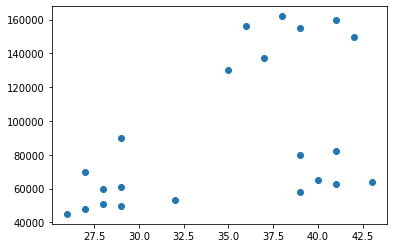

In [28]:
plt.scatter(df.Age,df['Income($)'])

In [29]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
 ypred= km.fit_predict(df[['Age','Income($)']])
 ypred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [31]:
df['cluster']=ypred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


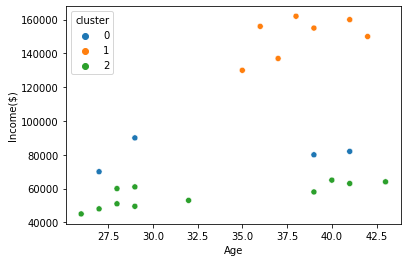

In [32]:
import seaborn as sns
sns.scatterplot(df.Age,df['Income($)'], data=df, hue='cluster', palette='tab10')
plt.show()

In [33]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age']= scaler.transform(df[['Age']])
scaler.fit(df[['Income($)']])
df['Income($)']= scaler.transform(df[['Income($)']])
df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


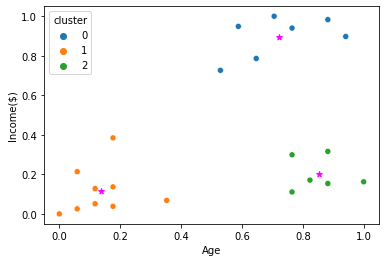

In [37]:
km = KMeans(n_clusters=3)
ypred= km.fit_predict(df[['Age','Income($)']])
df['cluster']=ypred
import seaborn as sns
sns.scatterplot(df.Age,df['Income($)'], data=df, hue='cluster', palette='tab10')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='Magenta', marker="*")
plt.show()

In [40]:
k_rng = range(1,11)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)

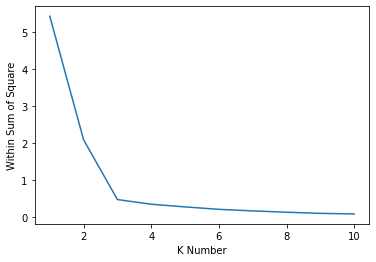

In [41]:
plt.xlabel('K Number')
plt.ylabel('Within Sum of Square')
plt.plot(k_rng,sse)